In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Library

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd
import seaborn as sns
import argparse
from PIL import Image
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

img = cv2.imread('/content/drive/MyDrive/Kuliah/3139316400.jpg')
dim = (500, 400)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)


#Gaussian Blur 

In [ ]:
#Functionm  konvolusi image
def convolution(oldimage, kernel):
    #image = Image.fromarray(image, 'RGB')
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', 
                           constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),
                                                (kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    return image_conv[h:h_end,w:w_end]

#function gaussian blur image
def GaussianBlurImage(image, sigma):
    #image = imread(image)
    image = np.asarray(image)
    #print(image)
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolution(image[:, :, c], gaussian_filter)
    return (im_filtered.astype(np.uint8))

Original Image

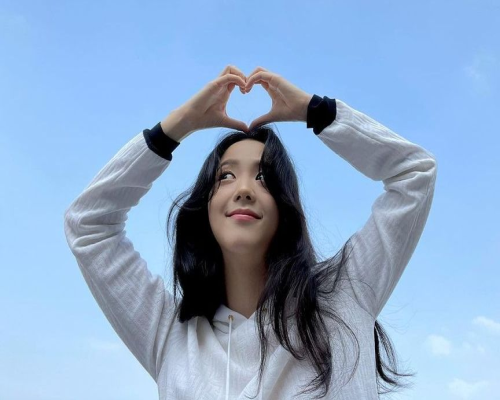

In [ ]:
imgblur = GaussianBlurImage(img, 1)
imgblur1 = GaussianBlurImage(img, 3)
cv2_imshow(img)

Gaussian Blur (sigma = 1)

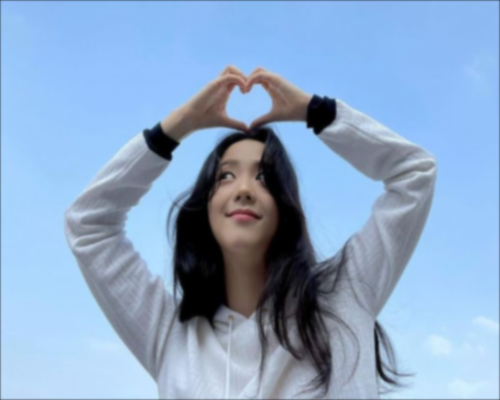

In [ ]:
cv2_imshow(imgblur)

Gaussian Blur (sigma = 3)

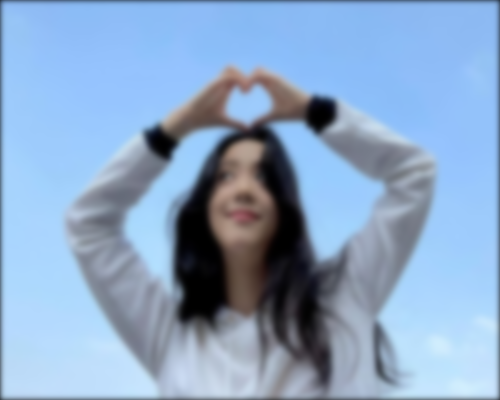

In [ ]:
cv2_imshow(imgblur1)

#Sharpening Image ( RGB Adjusted )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


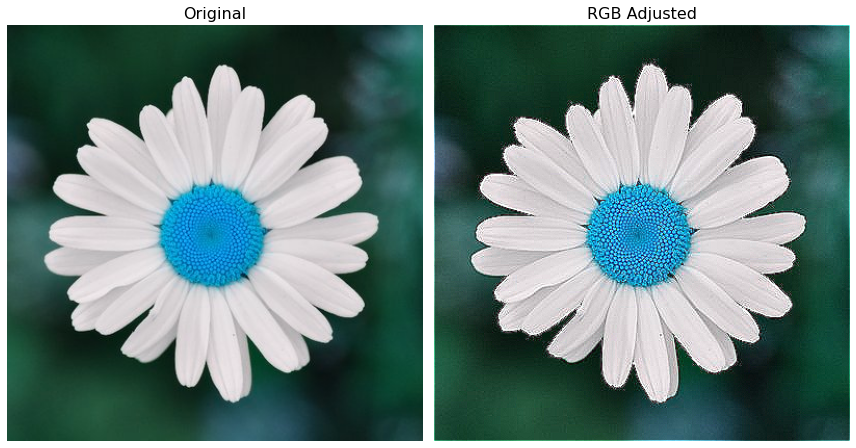

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Kuliah/pjEHfbdn_400x400.jpg')
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
#fungsu multi convoler
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

#fungsi sharpening dan perbadningan
def convolver_comparison(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, 
                      iterations)
    final_image_yuv = yuv2rgb(img_yuv)
     
    
    convolved_image_r = multi_convolver(image[:,:,0], kernel, 
                         iterations)
    convolved_image_g = multi_convolver(image[:,:,1], kernel, 
                         iterations)
    convolved_image_b  = multi_convolver(image[:,:,2], kernel,
                         iterations)
    
    final_image_rgb = np.dstack((np.rint(abs(convolved_image_r)), 
                                 np.rint(abs(convolved_image_g)), 
                                 np.rint(abs(convolved_image_b)))) / 255
                               
    fig, ax = plt.subplots(1,2, figsize = (12,12))
    
    ax[0].imshow(image)
    ax[0].set_title(f'Original', fontsize = 16)
    
    ax[1].imshow(final_image_rgb);
    ax[1].set_title(f'RGB Adjusted',  fontsize = 16)
    
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    fig.tight_layout()
convolver_comparison(img, sharpen, iterations = 1)

In [ ]:
from PIL import Image
#Fungsi Mengubah tingkat keterangan
img = '/content/drive/MyDrive/Kuliah/depositphotos_110415638-stock-photo-mosaic-striped-full-color-rainbow.jpg'
def change_brightness(filename, action, extent):
  
    #Memasukan data pixel image ke list
    original_image = Image.open(filename, 'r')
    pixels = original_image.getdata()

    #Inisiasi list kosong untuk image baru
    new_image = Image.new('RGB', original_image.size)
    new_image_list = []

    brightness_multiplier = 1.0

    if action == 'lighten':
        brightness_multiplier += (extent/100.0)
    else:
        brightness_multiplier -= (extent/100.0)

    #Untuk setiap pixel , ubah nilai ke versi gelap atau terang
    for pixel in pixels:
        new_pixel = (int(pixel[0] * brightness_multiplier),
                     int(pixel[1] * brightness_multiplier),
                     int(pixel[2] * brightness_multiplier))

        #Cek nilai pixel dalam kisaran rgb
        for pixel in new_pixel:
            if pixel > 255:
                pixel = 255
            elif pixel < 0:
                pixel = 0
        #Memasukan nilai pixel yang telah diubah kedalam list new_image
        new_image_list.append(new_pixel)

    #Memasukan nilai list ke dalam gambar baru
    new_image.putdata(new_image_list)
    return new_image

lighten = change_brightness(img,'lighten', 50)
darken  = change_brightness(img,'darken', 50)
ori = change_brightness(img,'lighten', 0)

Text(0.5, 1.0, 'Lighten')

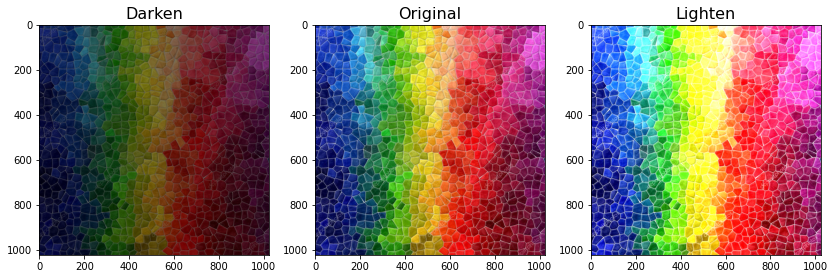

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (14,14))
ax[0].imshow(darken)
ax[0].set_title(f'Darken', fontsize = 16)
    
ax[1].imshow(ori);
ax[1].set_title(f'Original',  fontsize = 16)

ax[2].imshow(lighten);
ax[2].set_title(f'Lighten',  fontsize = 16)